# 00 - Environment Setup

This is the notebook that sets up the GCP project for the other notebooks in this repository.  Based on the [`Readme.md`](https://github.com/statmike/vertex-ai-mlops/blob/main/readme.md), you already have this repository of notebooks pulled as a local resource in your Vertex AI Workbench based notebook instance.


---
## Setup

inputs:

In [12]:
REGION = 'us-central1'
PROJECT_ID = 'nguyen-demo5'
DATANAME = 'taxi'

# Data source for this series of notebooks: Described in notebook 01
BQ_SOURCE = 'bigquery-public-data.chicago_taxi_trips.taxi_trips'

**Note**
 
This repository is set to use a BQ_SOURCE table from the `bigquery-public-data` project.  More information on this project [here](https://cloud.google.com/bigquery/public-data)

packages:

In [13]:
from google.cloud import storage
from google.cloud import bigquery

import pandas as pd
from sklearn import datasets

parameters:

In [14]:
BUCKET = PROJECT_ID

---
## Create Storage Bucket

In [15]:
gcs = storage.Client(project = PROJECT_ID)

In [16]:
if not gcs.lookup_bucket(BUCKET):
    bucketDef = gcs.bucket(BUCKET)
    bucket = gcs.create_bucket(bucketDef, project=PROJECT_ID, location=REGION)
    print(bucket)
else:
    print(gcs.lookup_bucket(BUCKET))

<Bucket: nguyen-demo5>


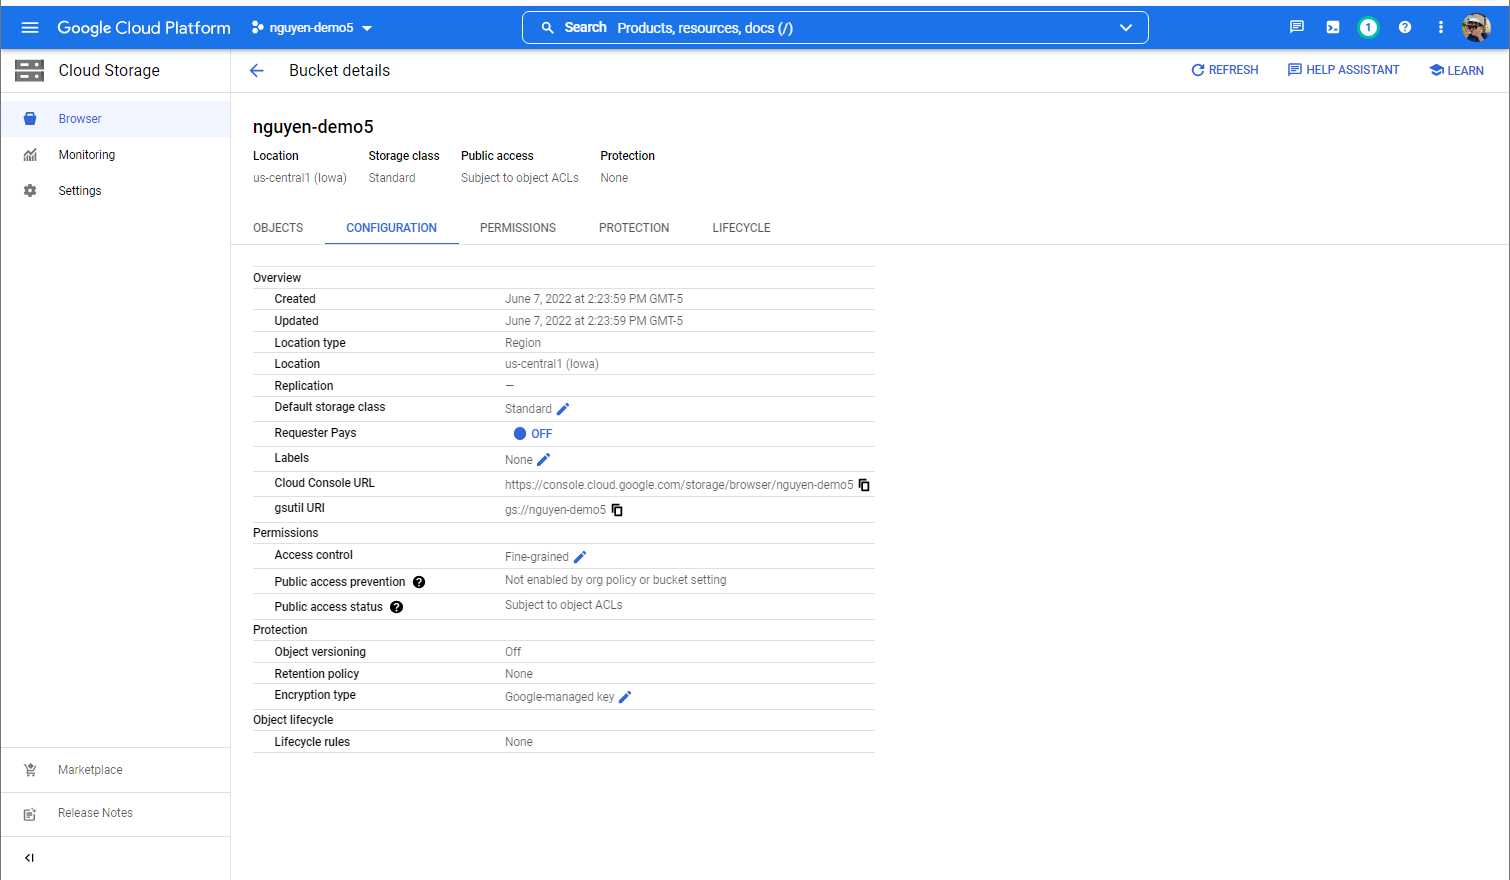

---
## Store Project Data in the Storage Bucket
- export from bigquery table to GCS bucket as CSV files
    - the table is referenced in the `BQ_SOURCE` variable at the top of this notebook
- https://cloud.google.com/bigquery/docs/exporting-data#python

In [17]:
bq = bigquery.Client(project = PROJECT_ID)
destination = f"gs://{BUCKET}/{DATANAME}/data/{DATANAME}_*.csv"
source = bigquery.TableReference.from_string(BQ_SOURCE)
extract = bq.extract_table(source, destination)

In [18]:
extract.result()

ExtractJob<project=nguyen-demo5, location=US, id=9be0f1d7-ed6e-47a7-a080-c8abf913ab97>

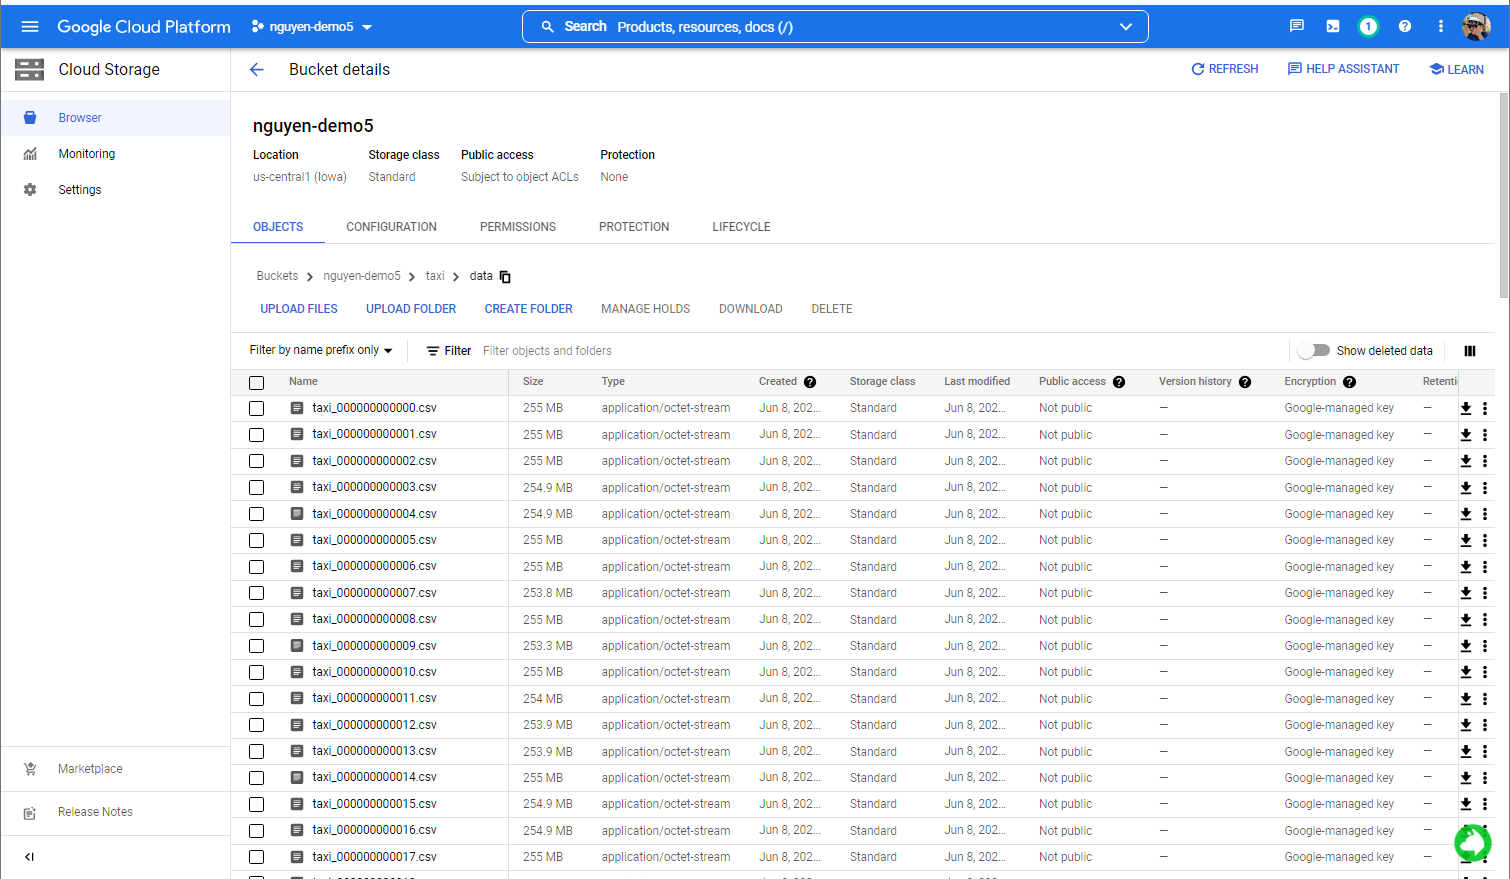

---
## Install KFP
If you get an error after a step, rerun it.  The dependecies sometimes resolve.

In [8]:
!pip install kfp -U -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx 0.26.3 requires absl-py<0.11,>=0.9, but you have absl-py 1.0.0 which is incompatible.
tfx 0.26.3 requires attrs<21,>=19.3.0, but you have attrs 21.4.0 which is incompatible.
tfx 0.26.3 requires click<8,>=7, but you have click 8.1.3 which is incompatible.
tfx 0.26.3 requires docker<5,>=4.1, but you have docker 5.0.3 which is incompatible.
tfx 0.26.3 requires kubernetes<12,>=10.0.1, but you have kubernetes 18.20.0 which is incompatible.
tfx 0.26.3 requires pyarrow<0.18,>=0.17, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 0.26.1 requires absl-py<0.11,>=0.9, but you have absl-py 1.0.0 which is incompatible.
tfx-bsl 0.26.1 requires pyarrow<0.18,>=0.17, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 0.26.0 requires absl-py<0.11,>=0.9, but you have absl-py 1.0.0 which is incompati

In [9]:
!pip install google-cloud-pipeline-components -U -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx 0.26.3 requires absl-py<0.11,>=0.9, but you have absl-py 1.0.0 which is incompatible.
tfx 0.26.3 requires attrs<21,>=19.3.0, but you have attrs 21.4.0 which is incompatible.
tfx 0.26.3 requires click<8,>=7, but you have click 8.1.3 which is incompatible.
tfx 0.26.3 requires docker<5,>=4.1, but you have docker 5.0.3 which is incompatible.
tfx 0.26.3 requires kubernetes<12,>=10.0.1, but you have kubernetes 18.20.0 which is incompatible.
tfx 0.26.3 requires pyarrow<0.18,>=0.17, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 0.26.1 requires absl-py<0.11,>=0.9, but you have absl-py 1.0.0 which is incompatible.
tfx-bsl 0.26.1 requires pyarrow<0.18,>=0.17, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 0.26.0 requires absl-py<0.11,>=0.9, but you have absl-py 1.0.0 which is incompati

---
## Other For Specific Notebooks

06 - Plotly used for visualizations

In [10]:
!pip install plotly -q

---
## Update AIPlatform Package:

The `google-cloud-aiplatform` package updates frequently.  Update it for latest functionality.
- Does this need to be run after KFP install below?

In [11]:
!pip install google-cloud-aiplatform -U -q